## Analysis of pandemic dynamics assuming SIR-like evolution
### Carlos Ignacio Herrera-Nolasco$^{1}$, Marco Arieli Herrera-Valdez$^{1}$
#### $^{1}$ Laboratorio de Fisiología de Sistemas, Facultad de Ciencias, UNAM


### Epidemic dynamics 

Assume that the population is divided in three subsets representing the non-infected and susceptible, the infected, and those that can no-longer participate in the chain of infections due to immunity or death. 
Let the densities of those subpopulations be represented by $x$, $y$, and $z$ respectively, with $1=x+y+z$. As a consequence,  $\partial_t x = -\partial_t y - \partial_t z$. Let  $\alpha$ represent the infection rate given an infectious contact, and $\tau$ the average waiting time until an individual is no longer infected. The dynamics for $y$ can be written as 
\begin{equation}
\partial_t y = \alpha y \bigg( 1- z - y \bigg) - \beta y,
\end{equation}
and the evolution for $z$ is then
\begin{equation}
\partial_t z = \beta y
\end{equation}

The incidence of cases is the number of new infected. From the equation for the change in $y$, the incidence is given by  $$f(y,z;\alpha) =\alpha y \bigg( 1- z - y \bigg),$$ which means that the incidence in the SIR model is a cuadratic function of the prevalence, but it also depends on $z$, the density of no-longer infected people. Since $z$ is an increasing function, then the graph of the incidence can be thought of as a curve in 3D space with quadratic shape. 


#### Parameters for modeling 
If $\gamma$ is the rate of removal by recovery and acquisition of immunity and $\delta$ is the fatality rate due to infection, we can try to obtain the parameters for the model from the data. To do so, consider the equation for $z$ to obtain,
\begin{equation}\beta = \frac{\partial_t z}{y},\end{equation} 
and also 
\begin{equation}\alpha = \frac{\partial_t y + \partial_t z}{y \bigg( 1 -z - y  \bigg)}. \end{equation} 
The problem is then to link the data to the variables $y$ and $z$.

### Linking the data to the modeling variables 

If $h$ is the time step for sampling, let $Y_{n}$ represent the number of cases at time $t=nh$. Note that $Y_n$ may be thought of in terms of the density of cases $y_n$. Explicitly, $y_n = Y_n/T $ here $T$ is the size of the local population.  From data, the cumulative number of cases at step $nh$ can be written as 
$$C_{n} = \sum_{k=0}^{n} Y_k$$
which means that the number of new cases (incidence) at time nh is 
$$Y_n = C_n - C_{n-1}.$$
The cumulative recoveries and deaths are 
$$Z_n = R_{n}+D_{n}.$$
The incidence is then 
$$C_n - R_n - D_n$$

#### Parameters for modeling 
We can try to obtain the parameters for the model from the data by approximated by substitution of the discrete differences 
$$
\partial_t y \approx \frac{u(t+h)-u(t)}{h},  \quad u \in \left\{Y,Z \right\}
$$
The parameters $\alpha$ and $\beta$ can then be estimated from the data. 


In [8]:
#import sys
#sys.path.insert(1, './')
#print(sys.path)
from dam_COVID19_baseCode import *
np.seterr(divide='ignore')
np.seterr(all='ignore')
import matplotlib.pylab as gr
small={'family' : 'normal','weight' : 'normal','size'   : 8}
medium={'family' : 'normal','weight' : 'normal','size'   : 10}
large={'family' : 'normal','weight' : 'bold','size'   : 13}
gr.rc('font', size=small['size'], weight='normal')          # controls default text sizes
gr.rc('axes', titlesize=medium['size'])     # fontsize of the axes title
gr.rc('axes', labelsize=medium['size'])    # fontsize of the x and y labels
gr.rc('xtick', labelsize=small['size'])    # fontsize of the tick labels
gr.rc('ytick', labelsize=small['size'])    # fontsize of the tick labels
gr.rc('legend', fontsize=small['size'])    # legend fontsize
gr.rc('figure', titlesize=large['size'])  # fontsize of the figure title
%matplotlib inline 

In [10]:
from NCW_baseCode import *

In [376]:
datosAbiertosCovid19Mexico='http://187.191.75.115/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip'
srcDir='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
dMexico = openCSV_DB(path=datosAbiertosCovid19Mexico,comp='zip',enc='latin-1')
cases, deathCases,recovCases = getCSSEGISandData(urlData=1)
dates = cases.columns[4:]
nDays = len(dates)
print('Got data from %d days between %s and %s'%(nDays,dates[0],dates[-1]))

Data obtained from http://187.191.75.115/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip
Data obtained from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Data obtained from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Data obtained from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv
Got data from 105 days between 1/22/20 and 5/5/20


In [13]:
cases.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,726,736,750,766,773,782,789,795,803,820
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,738,743,743,743,745,745,747,748,750,751
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,26,27,27,27,27,30,35,35,35,36
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,24,24,24,24,24,25,25,25,25,25
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,3892,4003,4127,4285,4428,4532,4681,4783,4887,5020
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,1746,1808,1867,1932,2066,2148,2273,2386,2507,2619
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,106,106,106,106,106,106,106,106,107,107
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,3002,3004,3016,3016,3025,3030,3035,3033,3035,3042


In [14]:
# ------------------------------
# Description of the data so that the headers and the columns
# without case data are distinguished
# ------------------------------
cases.head(10)
nHeaderRows=1;
#
nHeaderCols=3
# how to generate date lists from a baseline using the datetime
dates = cases.columns[4:]
nDays = len(dates)
days = np.arange(nDays)
print('Got data from %d days between %s and %s'%(nDays,dates[0],dates[-1]))
# -------------------
print("""""")
# -------------------
npCases = cases.to_numpy()
countries = np.unique(npCases[:,1])
nCountries = len(countries)
print('Considering data from {d} countries'.format(d=nCountries))
# -------------------
# Sum the counts from each country and construct a new array
# -------------------
# These arrays have the same size as the countries array (unique countries)
totCases=gatherDataByCountry(df=cases,nHeaderCols=4)
totDeathCases=gatherDataByCountry(df=deathCases,nHeaderCols=4)
totRecovCases=gatherDataByCountry(df=recovCases,nHeaderCols=4)
# Save all into a dictionary
G = {'cCases':totCases.transpose(), 'cDeaths':totDeathCases.transpose(),'cRecovs':totRecovCases.transpose(), 'countries':countries.transpose()}
# -------------------
# Search regions to illustrate the case-fatality ratios
# -------------------
Pops_Millions = {'Algeria':43851044, 'Argentina':45195774,'Australia':25499884,'Belgium':11433256,
                 'Brazil':212559417, 
                 'Canada':37742154, 'China':1439323776, 'Colombia':50882891,'Egypt':102334404,
                 'France':67886011,'Germany':83783942, 'Japan':126476461,'Korea, South':51269185,
                 'Indonesia':273523615, 'Iran':83992949,'Israel':8655535,'Italy':60461826,
                 'Mexico':128932753, 'Niger':24206644, 'Pakistan':220892340,'Poland':37846611,'Singapore':5850342, 
                 'South Africa':59308690,'Spain':46754778, 'Sweden': 10099265,
                 'United Kingdom':67886011, 'US':331002651, 'Venezuela':28870195}

Got data from 105 days between 1/22/20 and 5/5/20

Considering data from 187 countries


In [15]:
print(type(totCases))
print(totCases.shape)

<type 'numpy.ndarray'>
(105, 187)


#### Parabola describing the incidence as a function of the cases

In [77]:
def getSingleCountryData(G, popSize, cou):
    cInd = np.where(G['countries']==cou)[0][0]
    cases= np.float64(G['cCases'][cInd,:])
    recovs= np.float64(G['cRecovs'][cInd,:])
    deaths= np.float64(G['cDeaths'][cInd,:])
    Z = recovs+deaths
    countryD= {'cCases':cases,'cDeaths':deaths,'cRecovs':recovs, 'Z':Z}
    prevalence = (cases-recovs-deaths)/popSize[cou]
    #prevalenceNet = np.zeros(len(cases))
    #prevalenceNet[1:]= cases[1:]- cases[:-1]
    #prevalence = prevalenceNet/popSize[cou]
    countryD.update({'popSize':popSize[cou], 'cdCases':cases/popSize[cou], 'cdDeaths':deaths/popSize[cou], 'cdRecovs':np.divide(recovs,popSize[cou]), 'z':np.divide(Z,popSize[cou]), 'prevalence':prevalence,'name':cou})
    return countryD
    
def dataSIR_Country(countryD,a=2,b=0.0002):
    # Prevalence time series
    # The time series of cumulative cases without cumulative recovs and without deaths
    countryD['a']=a; countryD['b']=b
    # "Prevalence" of deaths and recoveries 
    y = countryD['prevalence'] 
    z = countryD['z'] 
    dy=np.zeros(len(countryD['prevalence'] )); dy[1:]= y[1:]-y[:1]
    dz=np.zeros(len(countryD['prevalence'] )); dz[1:]= z[1:]-z[:1]
    incidence = dy+dz
    x = 1-z-y
    countryD.update({'x':x, 'y':y, 'z':z,  'incid':incidence,'dy':dy,'dz':dz})
    countryD['beta']= np.divide(incidence,x*y)
    countryD['alpha']=np.divide(dz,x*y)
    countryD['R_t']= np.divide(incidence,dz)
    countryD['fy'] = a*y*(1-z -y) 
    countryD['Deltay']= a*y*(1-z -y-b) 
    return countryD


In [78]:
def dataSIRTimeSeries(countryD,ax1,densFact = 10**3):
    tax1 = ax1.twinx()
    prev= countryD['y']
    z = countryD['z']
    maxY=densFact*1.1*prev.max()
    ax1.plot(days, densFact*z,'o',markeredgecolor='green', markerfacecolor='white', label=r'$recov + death$')
    ax1.plot(days, densFact*prev,'b.',label=r'$prevalencia$')
    tax1.plot(days, countryD['R_t'],'.',color='orange',label=r'$R_t = (\Delta y_k / \Delta z_k) +1$')
    tax1.plot([days[0],days[-1]], [1,1],'k:')
    #
    if countryD['name']== 'China':
        ax1.legend(loc='upper center'); tax1.legend(loc='upper right')
    else:
        ax1.legend(loc='center left'); tax1.legend(loc='upper left')
        
    ax1.set_title(countryD['name'])
    ax1.set_xlabel(r'$t$ (days)'); ax1.set_ylabel(r'Cases x %d habitants'%densFact);
    ax1.set_ylim(0,maxY); tax1.set_ylim(0,10); 
    return tax1

In [79]:
def dataSIRPP(countryD,ax2,densFact = 10**3):
    tax2 = ax2.twinx()
    prev= countryD['y']
    incid= countryD['incid']
    z = countryD['z']
    dy = countryD['dy']
    maxY1=densFact*1.1*incid.max()
    maxY2=densFact*1.1*dy.max()
    ax2.plot(densFact*prev, densFact*incid,'b.',label=r'$Prevalencia$')
    ax2.plot(densFact*prev, densFact*dy,'.',color='orange',label=r'$\Delta Prevalencia$')
    #ax1.plot([0,(densFact*prev).max()], [0,0],'k:')
    tax2.plot([0,(densFact*prev).max()], [0,0],':',color='orange')
    #
    ax2.set_title(countryD['name'])
    ax2.set_xlabel(r'Prevalence $\times$ %d habitants'%densFact); 
    ax2.set_ylabel(r'Incidence x %d habitants'%densFact);
    ax2.set_ylabel(r'$\Delta y_k$ x %d habitants'%densFact);
    ax2.legend(loc='center left'); tax1.legend(loc='upper left')
    maxX = densFact*prev.max()
    maxY = np.maximum(densFact*dy.max(),densFact*incid.max())
    ax2.set_xlim(0,maxX); tax2.set_xlim(0,maxX); 
    ax2.set_ylim(0,maxY1); tax2.set_ylim(densFact*dy.min(),maxY2); 
    return tax2

In [221]:
def plotDataSIRMexico(countryD,ax1,ax2, densFact = 10**3):
    tax1 = ax1.twinx()
    incid= countryD['incid']
    prev= countryD['y']
    z = countryD['z']
    dy = countryD['dy']
    maxY=densFact*1.1*prev.max()
    ax1.plot(days, densFact*z,'o',markeredgecolor='green', markerfacecolor='white', label=r'$recup + fallec$')
    ax1.plot(days, densFact*prev,'b.',label=r'$prevalencia$')
    ax2.plot(densFact*prev, densFact*countryD['fy'],'o', markeredgecolor='blue', markerfacecolor='white', label=r'$f(y)$')
    ax2.plot(densFact*prev, densFact*countryD['Deltay'],'o', markeredgecolor='orange', markerfacecolor='white', label=r'$f(y)$')
    ax2.plot(densFact*prev, densFact*incid,'b.',label=r'$Prevalencia$')
    ax2.plot(densFact*prev, densFact*dy,'.',color='orange',label=r'$\Delta Prevalencia$')
    tax1.plot(days, countryD['R_t'],'.',color='orange',label=r'$R_t$')
    tax1.plot([days[0],days[-1]], [1,1],'k:')
    #
    ax1.set_xlabel('Dias desde $d_0$ (22 de enero)')
    ax2.set_xlabel('Incidencia x 1000')
    ax1.set_ylabel('#Prevalencia x 1000 habitantes')
    ax2.set_ylabel('#Prevalencia x 1000 habitantes')
    ax1.text(0,0.02,r'$R_t$=%g'%CC['R_t'][-1])
    ax1.legend(loc='center left'); tax1.legend(loc='upper left')
    #ax1.set_title(countryD['name']) 
    ax1.set_ylim(0,maxY); tax1.set_ylim(0,10); 
    return tax1

In [306]:
p = {'N0':120.0*10**6, 'I0':np.array([0,1,2,0]),'W0':0,'transmissionGExposure':0.5,
'exposure_N':0.40, 'exposure_I':np.array([1,1,0.1,0]),
'weight_I':np.array([0.3,0.55,0.1,0.05]), 'nI':4,
'stagesI':['Non severe','Mild/Moderate','Severe','Fatal'],
'stagesISpanish':['No graves','Moderados','Severos','Fatales'],
'infectiousTime':[14,21,25,25],'timeStep':1.0,'nSteps':360,
'pDeath':np.array([0.00001,0.0001,0.0005,0.001]),
'offset':-40, 'underReport':12}

p['timeStamps']= np.arange(0,103)
p['nSteps']= len(p['timeStamps'])
p['tGe'] = p['timeStep']* p['transmissionGExposure']
p['pWithdraw'] = p['timeStep'] / np.array(p['infectiousTime'])
p['iC'] = np.array([p['N0'],p['W0'],p['I0']])
print(p['iC'])
susc= np.int32( p['N0'] * p['exposure_N'] * p['weight_I'])
print(susc[0],p['tGe'] * np.dot( p['exposure_I'], p['I0'] ))
newI= binom.rvs( susc[0], p['tGe'] * np.dot( p['exposure_I'], p['I0'] ),loc=0, size=1)
randNIWIncidence(Z=p['iC'], p=p)

[120000000.0 0 array([0, 1, 2, 0])]
(14400000, 0.6)


array([-1, 0, array([1, 0, 0, 0])], dtype=object)

In [406]:
strCou='Mexico'
CC= getSingleCountryData(G, popSize= Pops_Millions, cou=strCou)
CC= dataSIR_Country(CC,a=6, b= 0.825)

convFact=0.001; densFact=1000
p['timeStamps']= np.arange(0,200)
p['nSteps']= len(p['timeStamps'])
N,W,I= randNIWDynamics(p, rhs=randNIWIncidence, nonAutPars={})
INon= np.array([I[m][0] for m in range(len(I))])
IMild= np.array([I[m][1] for m in range(len(I))])
ISevere= np.array([I[m][2] for m in range(len(I))])
IFatal= np.array([I[m][3] for m in range(len(I))])
ITot = (INon+IMild+ISevere+IFatal)*convFact*densFact
xx = np.float64(N*convFact*densFact)/CC['popSize']
ww = np.float64(W*convFact*densFact)/CC['popSize']
yyTot = np.float64(ITot*convFact*densFact)/CC['popSize']
yySev = np.float64(ISevere*convFact*densFact)/CC['popSize']
yyFat = np.float64(IFatal*convFact*densFact)/CC['popSize']
yyMld = np.float64(IMild*convFact*densFact)/CC['popSize']
yyNon = np.float64(INon*convFact*densFact)/CC['popSize']
#gr.plot(p['timeStamps'],xx)
#gr.plot(p['timeStamps'],ww)


Marzo 31, 53 días para el pico
Abril 30, 23 días para el pico
Enero 1, -22 días para el pico
Diciembre 14, 2019, -36 desde el pricipio
Diciembre 4, 2019, -50 desde el pricipio
Diciembre 1, 2019, -53 desde el pricipio


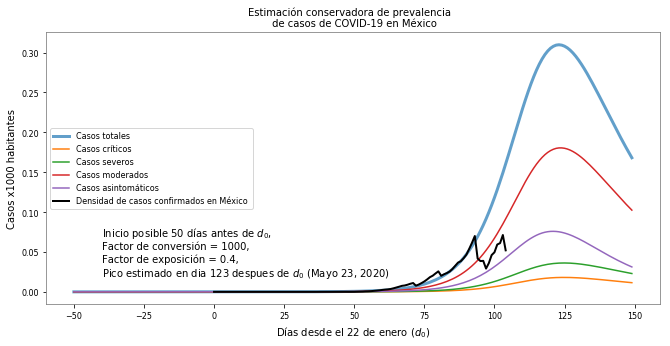

In [434]:
p['offset']=50; densFact=1000
xTicks= np.arange(0,len(days),7)
#
Enero31=yyTot.argmax()-p['offset'] -10 
Feb29=Enero31-29
Mar31=Feb29-31; print(u'Marzo 31, %d días para el pico'%Mar31)
Abr30=Mar31-30; print(u'Abril 30, %d días para el pico'%Abr30)
Ene1_2020=-22; print(u'Enero 1, %d días para el pico'%Ene1_2020)
Dic14_2019=Ene1_2020-14; print(u'Diciembre 14, 2019, %d desde el pricipio'%Dic14_2019)
Dic4_2019=Ene1_2020-28; s_Dic4_2019= u'Diciembre 4, 2019, %d desde el pricipio'%Dic4_2019;print(s_Dic4_2019)
Dic1_2019=Ene1_2020-31; s_1Dic2019=u'Diciembre 1, 2019, %d desde el pricipio'%Dic1_2019; print(s_1Dic2019)
#
f = gr.figure(figsize=(11,5))
ax= f.add_subplot(1,1,1)
ax.plot(p['timeStamps'] -p['offset'],yyTot,lw=3,alpha=0.7,label=r'Casos totales')
ax.plot(p['timeStamps'] -p['offset'],yyFat,label=u'Casos críticos')
ax.plot(p['timeStamps'] -p['offset'],yySev,label=r'Casos severos')
ax.plot(p['timeStamps'] -p['offset'],yyMld,label=r'Casos moderados')
ax.plot(p['timeStamps'] -p['offset'],yyNon,label=u'Casos asintomáticos')
ax.plot(days,CC['y']*densFact,'k',lw=2,alpha=1,label=u'Densidad de casos confirmados en México ')
#ax.set_xticklabels(dates[xTicks],{'fontsize':8})
#for label in ax.get_xticklabels():
#    label.set_rotation(45)
#    label.set_horizontalalignment('center')
#    label.set_fontsize(8)
#    label.set_horizontaloffset=-15
ax.set_ylabel('Casos x1000 habitantes')
ax.set_xlabel(u'Días desde el 22 de enero ($d_0$)')
ax.set_title(u'''Estimación conservadora de prevalencia  \n de casos de COVID-19 en México''')
str1=u'''Inicio posible %d días antes de $d_0$, \nFactor de conversión = %g, \nFactor de exposición = %g, \nPico estimado en dia %d despues de $d_0$ (Mayo 23, 2020),\n'''%(p['offset'],1/convFact,p['exposure_N'], yyTot.argmax()-p['offset'])
ax.text(-40,0.02,str1)
ax.legend(loc='center left')
f.savefig('../figures_COVID19_dataAnalysis/Simulacion_COVID-19_Mexico_gruposInfecciosos')


Saving file to ../figures_COVID19_dataAnalysis/dam_COVID19_JHU_dynamicsDataSIRPP_Mexico.png
[5.         5.         5.         6.         6.         7.
 7.         1.75       2.         3.         6.5        2.43578644
 2.65449438 2.9477304  3.2176781  3.59819121 3.9417596  4.16082225
 4.43879908 4.65673289 2.25386847 2.30528736 2.27805907 2.27156177
 2.41171965 2.57394234 2.70162162 2.49351041 2.62713387 2.72703789
 2.93133167 3.14745671 3.34511435 1.63733144 1.51231324 1.47614068
 1.28940887 1.35302166 1.44737238 1.4453272  1.52985178 1.50445484
 1.58448912 1.34725889]


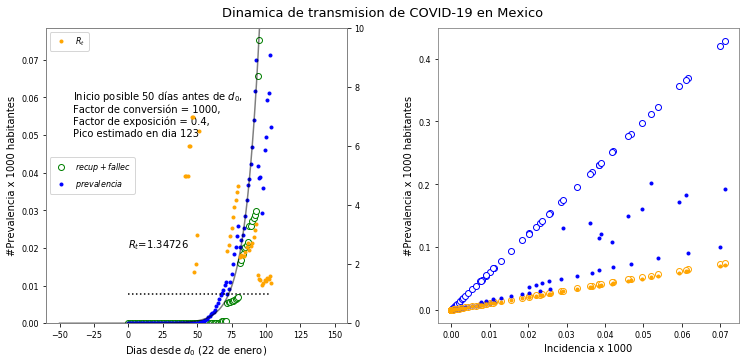

In [423]:
ff =gr.figure(figsize=(11,5)); gr.ioff(); rows=1;cols=2
ax1=ff.add_subplot(rows,cols,1)
ax2=ff.add_subplot(rows,cols,2)
densFact=10**3
tax2=plotDataSIRMexico(CC,ax1,ax2,densFact)
ax1.plot(p['timeStamps']-p['offset'],yyTot,'k',alpha=0.5)
str1=u'''Inicio posible %d días antes de $d_0$, \nFactor de conversión = %g, \nFactor de exposición = %g, \nPico estimado en dia %d '''%(p['offset'],1/convFact,p['exposure_N'], yyTot.argmax()-p['offset'])
ax1.text(-40,0.05,str1)
gr.ion();gr.draw()
fN= '../figures_COVID19_dataAnalysis/dam_COVID19_JHU_dynamicsDataSIRPP_%s.png'%strCou
ff.suptitle('Dinamica de transmision de COVID-19 en Mexico')
ff.subplots_adjust(left=0.075,bottom=0.1,right=0.95,top=0.92,wspace=0.3,hspace=0.25)
ff.savefig(fN)
print('Saving file to %s'%fN)
print(CC['R_t'][CC['R_t']<10])

Processing data for 28 countries
Brazil
Canada
Italy
France
Argentina
Venezuela
Israel
Australia
Iran
Algeria
Singapore
China
Belgium
Germany
Spain
Poland
Indonesia
Sweden
Pakistan
Mexico
Egypt
South Africa
Korea, South
US
United Kingdom
Colombia
Japan
Niger
Saving file to ../figures_COVID19_dataAnalysis/dam_COVID19_JHU_dynamicsDataSIR_globalSample.png


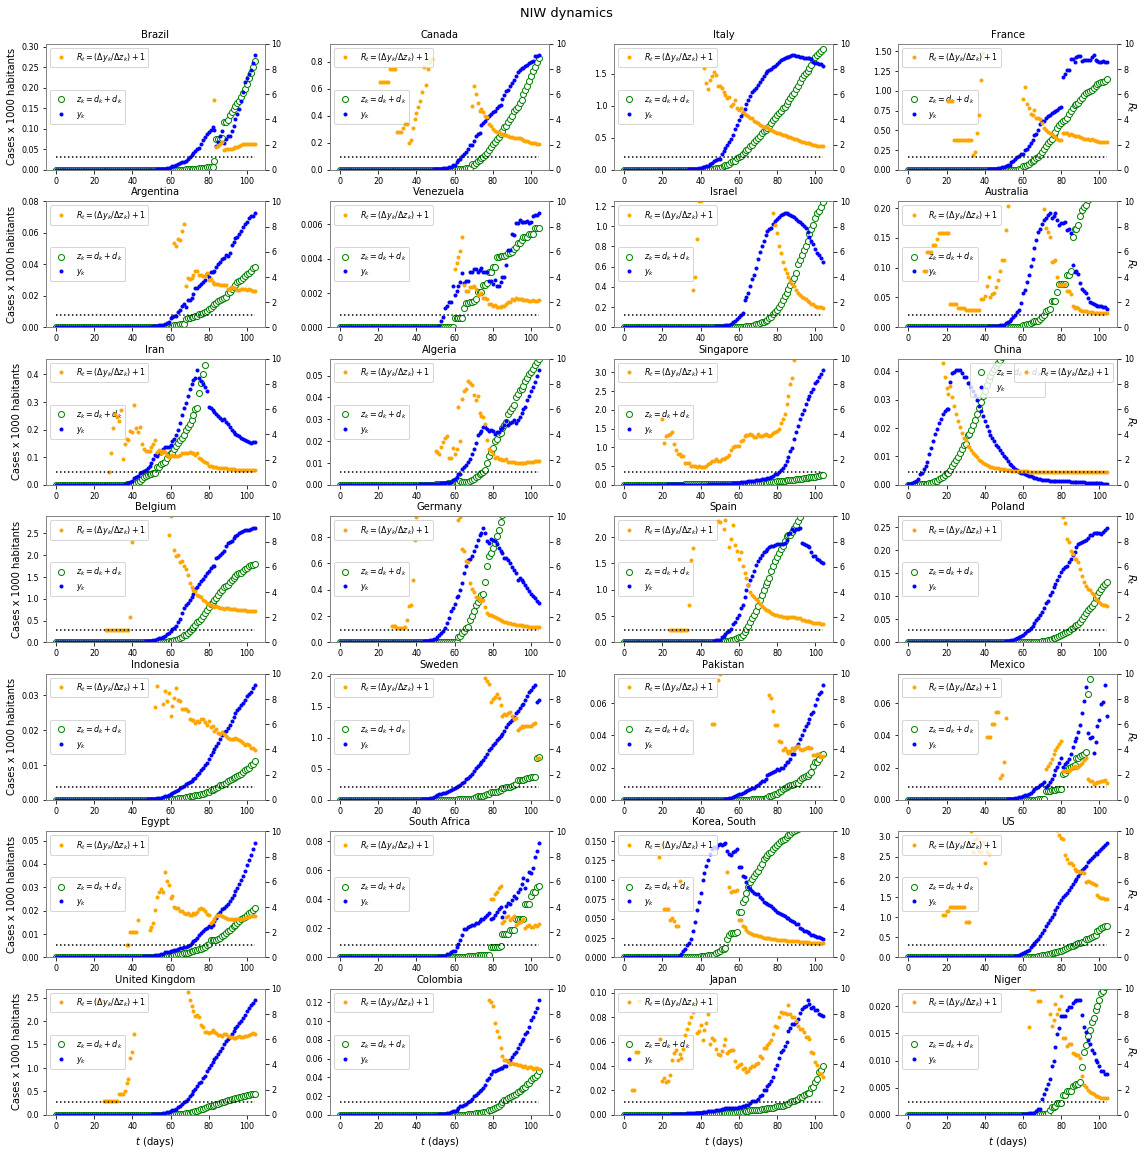

In [46]:
coun = ['China','Korea, South','Japan', 'Australia', 'Italy', 'Spain', 'Belgium', 'Germany', 'United Kingdom', 'US', 'Mexico', 'Argentina', 'Canada', 'Brazil']
coun = Pops_Millions.keys()
nCou =len(coun)
print('Processing data for %d countries'%nCou)
ff =gr.figure(figsize=(17,17)); gr.ioff(); 
ax=list(); cols=4; rows=np.ceil(np.float64(nCou)/cols)
for n in range(nCou):
    print('%s'% coun[n])
    ax.append(ff.add_subplot(rows,cols,n+1))
    cc = getSingleCountryData(G, popSize= Pops_Millions, cou=coun[n])
    cc = dataSIR_Country(countryD=cc,a=2, b= 0.0000251)
    tax1=dataSIRTimeSeries(cc,ax[n])
    if n < rows*cols - cols:
        ax[n].set_xlabel('')
    if n%4 >0:
        ax[n].set_ylabel('')
    if n%cols == cols-1:
        tax1.set_ylabel(r'$R_t$',rotation=-90)
        
gr.ion(); gr.draw()
fN= '../figures_COVID19_dataAnalysis/dam_COVID19_JHU_dynamicsDataSIR_globalSample.png'
ff.suptitle('NIW dynamics')
ff.subplots_adjust(left=0.075,bottom=0.075,right=0.95,top=0.95,wspace=0.3,hspace=0.25)
ff.savefig(fN)
print('Saving file to %s'%fN)


Processing data for 28 countries
Brazil
Canada
Italy
France
Argentina
Venezuela
Israel
Australia
Iran
Algeria
Singapore
China
Belgium
Germany
Spain
Poland
Indonesia
Sweden
Pakistan
Mexico
Egypt
South Africa
Korea, South
US
United Kingdom
Colombia
Japan
Niger
Saving file to ../figures_COVID19_dataAnalysis/dam_COVID19_JHU_dynamicsDataSIRPP_globalSample.png


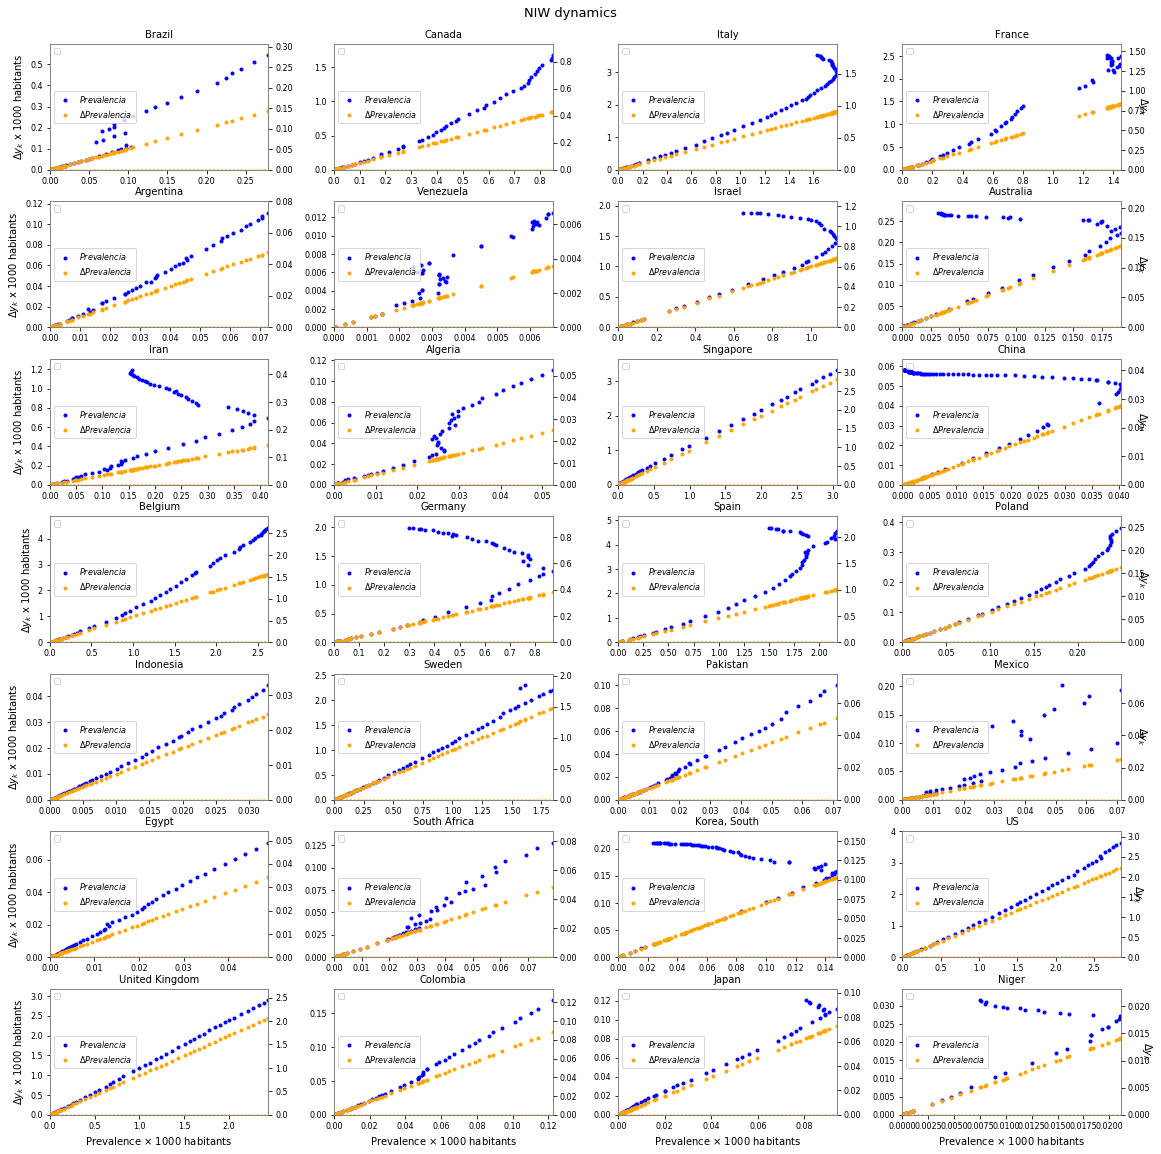

In [47]:
coun = ['China','Korea, South','Japan', 'Australia', 'Italy', 'Spain', 'Belgium', 'Germany', 'United Kingdom', 'US', 'Mexico', 'Argentina', 'Canada', 'Brazil']
coun = Pops_Millions.keys()
nCou =len(coun)
print('Processing data for %d countries'%nCou)
ff =gr.figure(figsize=(17,17)); gr.ioff(); 
ax=list(); cols=4; rows=np.ceil(np.float64(nCou)/cols)
for n in range(nCou):
    print('%s'% coun[n])
    ax.append(ff.add_subplot(rows,cols,n+1))
    cc = getSingleCountryData(G, popSize= Pops_Millions, cou=coun[n])
    cc = dataSIR_Country(countryD=cc,a=2, b= 0.0000251)
    tax1=dataSIRPP(cc,ax[n],densFact = 10**3)
    if n < rows*cols - cols:
        ax[n].set_xlabel('')
    if n%4 >0:
        ax[n].set_ylabel('')
    if n%cols == cols-1:
        tax1.set_ylabel(r'$\Delta y_k$',rotation=-90)
        
gr.ion(); gr.draw()
fN= '../figures_COVID19_dataAnalysis/dam_COVID19_JHU_dynamicsDataSIRPP_globalSample.png'
ff.suptitle('NIW dynamics')
ff.subplots_adjust(left=0.075,bottom=0.075,right=0.95,top=0.95,wspace=0.3,hspace=0.25)
ff.savefig(fN)
print('Saving file to %s'%fN)


Saving file to ../figures_COVID19_dataAnalysis/dam_COVID19_JHU_dynamicsDataSIRPP_China.png


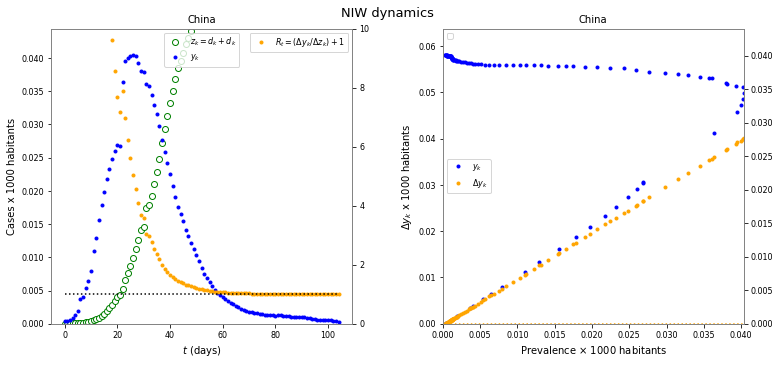

In [21]:
strCou='China'
CC= getSingleCountryData(G, popSize= Pops_Millions, cou=strCou)
CC= dataSIR_Country(CC,a=2, b= 0.001)
ff =gr.figure(figsize=(11,5)); gr.ioff(); rows=1;cols=2
ax1=ff.add_subplot(rows,cols,1)
ax2=ff.add_subplot(rows,cols,2)
tax1=dataSIRTimeSeries(CC,ax1,densFact = 10**3)
tax2=dataSIRPP(CC,ax2,densFact = 10**3)
gr.ion();gr.draw()
fN= '../figures_COVID19_dataAnalysis/dam_COVID19_JHU_dynamicsDataSIRPP_%s.png'%strCou
ff.suptitle('NIW dynamics')
ff.subplots_adjust(left=0.075,bottom=0.1,right=0.95,top=0.92,wspace=0.3,hspace=0.25)
ff.savefig(fN)
print('Saving file to %s'%fN)

Saving file to ../figures_COVID19_dataAnalysis/dam_COVID19_JHU_dynamicsDataSIRPP_Italy.png


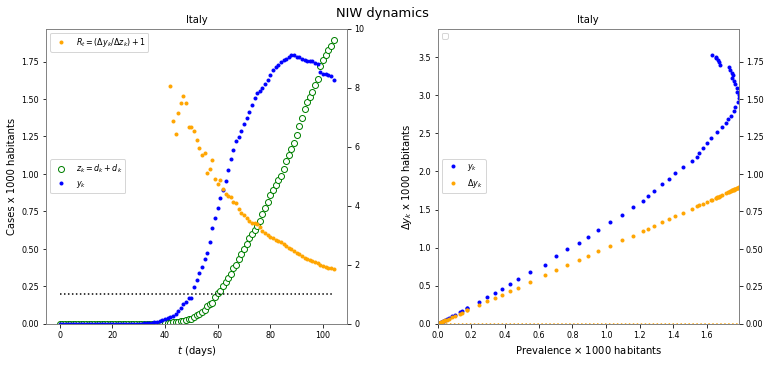

In [22]:
strCou='Italy'
CC= getSingleCountryData(G, popSize= Pops_Millions, cou=strCou)
CC= dataSIR_Country(CC,a=2, b= 0.001)
ff =gr.figure(figsize=(11,5)); gr.ioff(); rows=1;cols=2
ax1=ff.add_subplot(rows,cols,1)
ax2=ff.add_subplot(rows,cols,2)
tax1=dataSIRTimeSeries(CC,ax1,densFact = 10**3)
tax2=dataSIRPP(CC,ax2,densFact = 10**3)
gr.ion();gr.draw()
fN= '../figures_COVID19_dataAnalysis/dam_COVID19_JHU_dynamicsDataSIRPP_%s.png'%strCou
ff.suptitle('NIW dynamics')
ff.subplots_adjust(left=0.075,bottom=0.1,right=0.95,top=0.92,wspace=0.3,hspace=0.25)
ff.savefig(fN)
print('Saving file to %s'%fN)

Saving file to ../figures_COVID19_dataAnalysis/dam_COVID19_JHU_dynamicsDataSIRPP_Spain.png


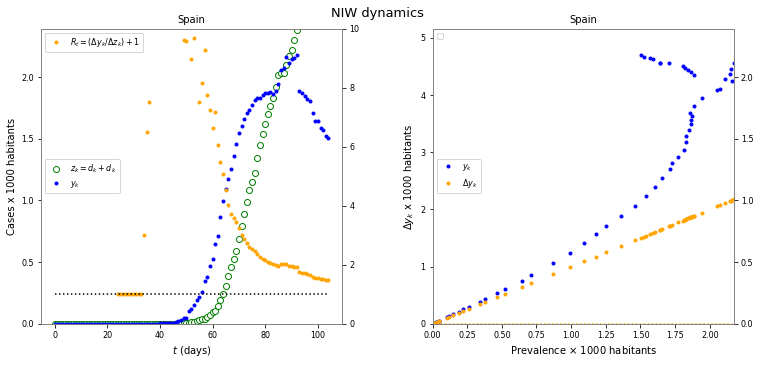

In [23]:
strCou='Spain'
CC= getSingleCountryData(G, popSize= Pops_Millions, cou=strCou)
CC= dataSIR_Country(CC,a=2, b= 0.001)
ff =gr.figure(figsize=(11,5)); gr.ioff(); rows=1;cols=2
ax1=ff.add_subplot(rows,cols,1)
ax2=ff.add_subplot(rows,cols,2)
tax1=dataSIRTimeSeries(CC,ax1,densFact = 10**3)
tax2=dataSIRPP(CC,ax2,densFact = 10**3)
gr.ion();gr.draw()
fN= '../figures_COVID19_dataAnalysis/dam_COVID19_JHU_dynamicsDataSIRPP_%s.png'%strCou
ff.suptitle('NIW dynamics')
ff.subplots_adjust(left=0.075,bottom=0.1,right=0.95,top=0.92,wspace=0.3,hspace=0.25)
ff.savefig(fN)
print('Saving file to %s'%fN)

Saving file to ../figures_COVID19_dataAnalysis/dam_COVID19_JHU_dynamicsDataSIRPP_SouthKorea.png


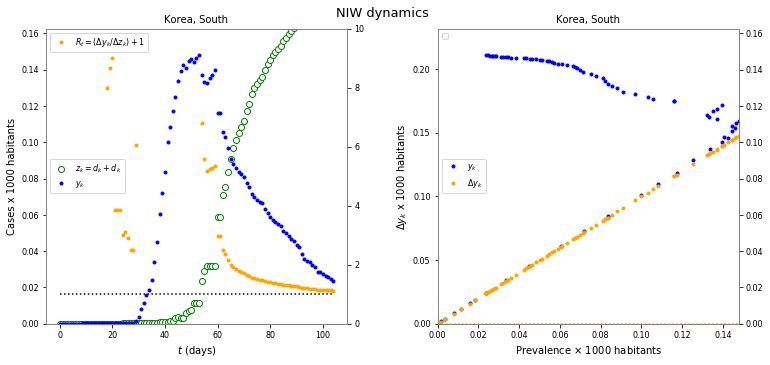

In [24]:
strCou='Korea, South'
CC= getSingleCountryData(G, popSize= Pops_Millions, cou=strCou)
CC= dataSIR_Country(CC,a=2, b= 0.001)
ff =gr.figure(figsize=(11,5)); gr.ioff(); rows=1;cols=2
ax1=ff.add_subplot(rows,cols,1)
ax2=ff.add_subplot(rows,cols,2)
tax1=dataSIRTimeSeries(CC,ax1,densFact = 10**3)
tax2=dataSIRPP(CC,ax2,densFact = 10**3)
gr.ion();gr.draw()
fN= '../figures_COVID19_dataAnalysis/dam_COVID19_JHU_dynamicsDataSIRPP_SouthKorea.png'
ff.suptitle('NIW dynamics')
ff.subplots_adjust(left=0.075,bottom=0.1,right=0.95,top=0.92,wspace=0.3,hspace=0.25)
ff.savefig(fN)
print('Saving file to %s'%fN)

In [237]:
def plotDataPhasePortraits(country,densities=1):
    ff =gr.figure(figsize=(17,5)); gr.ioff(); rows=1; cols=3
    ax1= ff.add_subplot(rows,cols,1); tax1= ax1.twinx()
    ax2= ff.add_subplot(rows,cols,2); #tax2= ax2.twiny()
    ax3= ff.add_subplot(rows,cols,3); tax3= ax3.twinx()
    tax1.plot(days, country['R_t'],'o',markeredgecolor='blue', markerfacecolor='white',label=r'$R_t =\alpha (1-z-y)/\beta$')
    tax1.plot([days[0],days[-1]], [1,1],'k:')
    prev= country['y']
    dea = country['cdDeaths']
    rec = country['cdRecovs']
    z = country['z']
    dy = country['dy']
    maxY=1.5*prev.max()
    ax1.plot(days, prev,'b.',label=r'$y_k$')
    #ax1.plot(days, dea,'.',label=r'$D_k$')
    #ax1.plot(days, rec,'.',label=r'$R_k$')
    ax1.plot(days, z,'.',color='k',label=r'$z_k=d_k + d_k$')
    #
    ax2.plot(country['fy'],prev,'o',markeredgecolor='orange', markerfacecolor='white',label=r'$f(y)= %g y (1-z-y)$'%(country['a']))
    ax2.plot(country['incid'],prev,'.',color='blue')
    ax2.plot([0,0],[0,prev.max()],'k:')
    ax3.plot([0,0],[0,prev.max()],'k:')
    ax3.plot(dy,prev,'b.',label=r'$f (y)= %g y (1 -%g-z-y)$'%(country['a'],country['b']))
    ax3.plot(country['fy'],prev,'o',markeredgecolor='orange', markerfacecolor='white',label=r'$f (y)= %g y (1 -%g-z-y)$'%(country['a'],country['b']))
    #
    #ax3.plot(days,country['alpha'],'.',color='blue',label=r'$\alpha$')
    #tax3.plot(days,country['beta'],'.',color='orange',label=r'$\beta$')
    #ax3.set_ylim(0,10);     tax3.set_ylim(0,1)
    #ax2.set_xlim(-0.0001,maxXPP.max())
    ax1.set_xlabel(r'$t$ (days)');ax2.set_xlabel(r'$y_{k+1}-y_k$'); ax3.set_xlabel(r'$y_{k+1}-y_k$');
    ax1.legend(loc='center left'); tax1.legend(loc='upper left')
    ax1.set_ylim(0,maxY); ax2.set_ylim(0,maxY); tax1.set_ylim(0,10); 
    ax2.legend(loc='lower right'); 
    ax3.legend(loc='upper left'); #tax3.legend(loc='center left'); 
    gr.ion(); gr.draw()
    fN= '../figures_COVID19_dataAnalysis/dam_COVID19_JHU_phasePlane_%s.png'%country['name']
    ff.suptitle('Phase plane, %s'%country['name'])
    ff.subplots_adjust(left=0.075,bottom=0.075,right=0.9,top=0.9,wspace=0.2,hspace=0.25)
    ff.savefig(fN)
    print('Saving file to %s'%fN)
    return ff

Examples of phase plane dynamics